Загрузка библиотек:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Tuple, Optional
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

Создание датасета с линейной зависимостью и случайным шумом

In [3]:
def create_dataset(start: float, stop: float, num_points: int, slope: float, noise: float, offset: float,
                   noise_range: Optional[Tuple[int, int]] = None, additional_noise: Optional[float] = None) -> Tuple[np.ndarray, np.ndarray]:
    xs = np.linspace(start, stop, num_points)
    ys = slope * xs + np.random.random(num_points) * noise - offset
    if noise_range and additional_noise:
        ys[noise_range[0]:noise_range[1]] += additional_noise
    return xs, ys

Отображение датасета с заданным цветом и заголовком

In [4]:
def plot_dataset(xs: np.ndarray, ys: np.ndarray, color: str, title: str) -> None:
    plt.figure()
    plt.scatter(xs, ys, color=color)
    plt.title(title)
    plt.xlabel('xs')
    plt.ylabel('ys')
    plt.show()

Анализ линейной регрессии: обучение модели, вывод метрик, построение графика, сохранение результатов

In [5]:
def linear_regression_analysis(xs: np.ndarray, ys: np.ndarray, color: str, title: str, output_prefix: str) -> None:
    reg = LinearRegression()
    reg.fit(xs.reshape(-1, 1), ys)

    approx = reg.predict(xs.reshape(-1, 1))

    mse = mean_squared_error(ys, approx)
    r2 = r2_score(ys, approx)
    coef = reg.coef_
    print(f"Mean squared error for {title}: {mse:.2f}")
    print(f"Coefficient of determination for {title}: {r2:.2f}")
    print(f"Coefficients for {title}: {coef}")

    plt.scatter(xs, ys, color=color)
    plt.plot(xs.reshape(-1, 1), approx, color="blue", linewidth=3)
    plt.title(title)
    plt.xlabel('xs')
    plt.ylabel('ys')
    plt.show()

    np.savetxt(f"ys.csv", ys, delimiter=",")
    np.savetxt(f"approx.csv", approx, delimiter=",")

Создание тестового файла для проверки метрик модели с использованием pytest

In [44]:
%%writefile test_score.py
import pytest
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

@pytest.fixture()
def load_ys():
  ys = np. loadtxt("ys.csv", delimiter=",")
  return(ys)

@pytest.fixture()
def load_approx():
  approx = np.loadtxt("approx.csv", delimiter=",")
  return(approx)

def test_mse_1(load_ys, load_approx):
  assert mean_squared_error(load_ys, load_approx) < 1

def test_mse_0_8(load_ys, load_approx):
  assert mean_squared_error(load_ys, load_approx) < 0.8

def test_r2_0_9(load_ys, load_approx):
  assert r2_score(load_ys, load_approx) > 0.9

def test_r2_0_7(load_ys, load_approx):
  assert r2_score(load_ys, load_approx) > 0.7

Overwriting test_score.py


Создание папки test_module

In [34]:
!mkdir test_module

mkdir: cannot create directory ‘test_module’: File exists


Создание тестового файла для проверки метрик модели с использованием unittest

In [35]:
%%writefile test_module/test_unit.py
import unittest
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

class TestMethods(unittest. TestCase):

  def test_mse(self):
    ys = np.loadtxt("ys.csv", delimiter=",")
    approx = np.loadtxt("approx.csv", delimiter=",")
    self.assertTrue(mean_squared_error(ys, approx) < 1)

  def test_r2(self):
    ys = np.loadtxt("ys.csv", delimiter=",")
    approx = np.loadtxt("approx.csv", delimiter=",")
    self.assertTrue(r2_score(ys, approx) > 0.9)

if __name__ == '__main__':
   unittest.main()

Overwriting test_module/test_unit.py


Отображение первого датасета

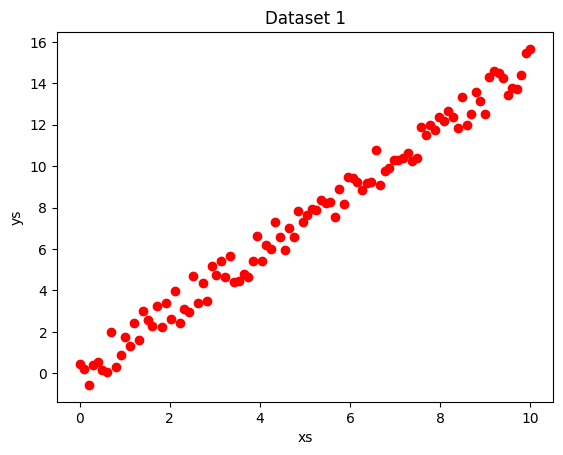

In [57]:
xs1, ys1 = create_dataset(0, 10, 100, 1.5, 2, 1)
plot_dataset(xs1, ys1, 'red', 'Dataset 1')

Анализ линейной регрессии для первого датасета и сохранение результатов

Mean squared error for Dataset 1: 0.31
Coefficient of determination for Dataset 1: 0.98
Coefficients for Dataset 1: [1.49845466]


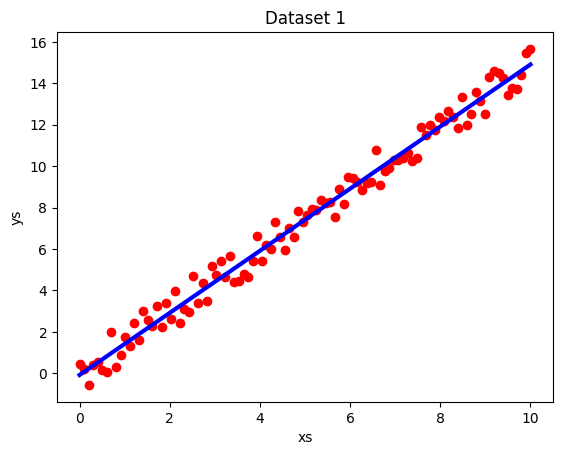

In [58]:
linear_regression_analysis(xs1, ys1, 'red', 'Dataset 1', 'dataset1')

Запуск тестов с использованием unittest

In [60]:
!python -m unittest test_module/test_unit.py

..
----------------------------------------------------------------------
Ran 2 tests in 0.003s

OK


Запуск тестов с использованием pytest

In [61]:
!pytest -v test_score.py

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.4, pluggy-1.5.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collected 4 items                                                                                  

test_score.py::test_mse_1 PASSED                                                             [ 25%]
test_score.py::test_mse_0_8 PASSED                                                           [ 50%]
test_score.py::test_r2_0_9 PASSED                                                            [ 75%]
test_score.py::test_r2_0_7 PASSED                                                            [100%]

======================================== 4 passed in 0.64s =========================================


Отображение второго датасета

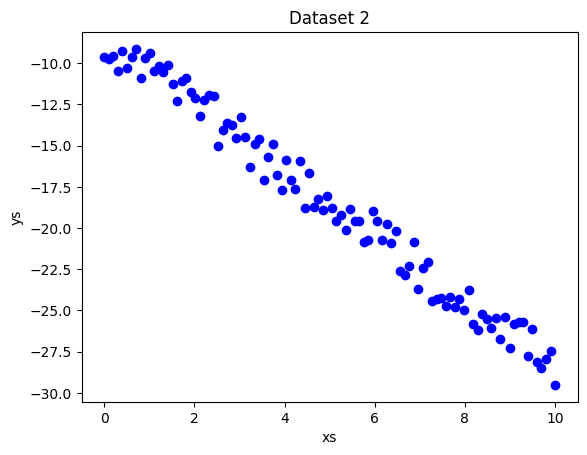

In [45]:
xs2, ys2 = create_dataset(0, 10, 100, -2.0, 3, 10)
plot_dataset(xs2, ys2, 'blue', 'Dataset 2')

Mean squared error for Dataset 2: 0.72
Coefficient of determination for Dataset 2: 0.98
Coefficients for Dataset 2: [-2.01219444]


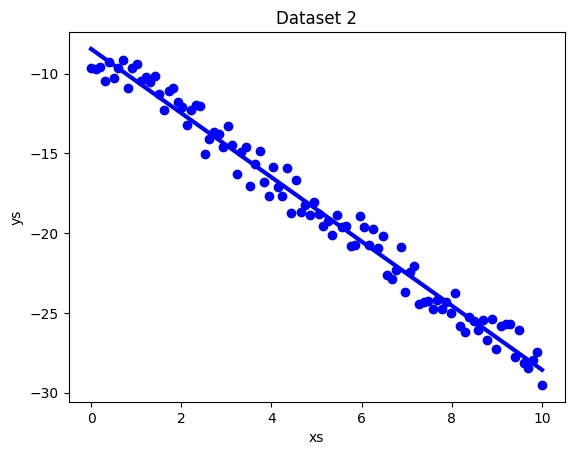

In [46]:
linear_regression_analysis(xs2, ys2, 'blue', 'Dataset 2', 'dataset2')

In [47]:
!python -m unittest test_module/test_unit.py

..
----------------------------------------------------------------------
Ran 2 tests in 0.003s

OK


In [48]:
!pytest -v test_score.py

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.4, pluggy-1.5.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collected 4 items                                                                                  

test_score.py::test_mse_1 PASSED                                                             [ 25%]
test_score.py::test_mse_0_8 PASSED                                                           [ 50%]
test_score.py::test_r2_0_9 PASSED                                                            [ 75%]
test_score.py::test_r2_0_7 PASSED                                                            [100%]

======================================== 4 passed in 0.66s =========================================


Отображение третьего датасета

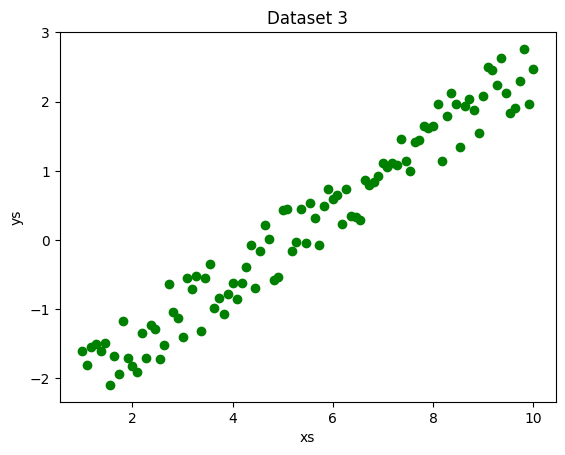

In [49]:
xs3, ys3 = create_dataset(1, 10, 100, 0.5, 1, 3)
plot_dataset(xs3, ys3, 'green', 'Dataset 3')

Mean squared error for Dataset 3: 0.09
Coefficient of determination for Dataset 3: 0.95
Coefficients for Dataset 3: [0.50178399]


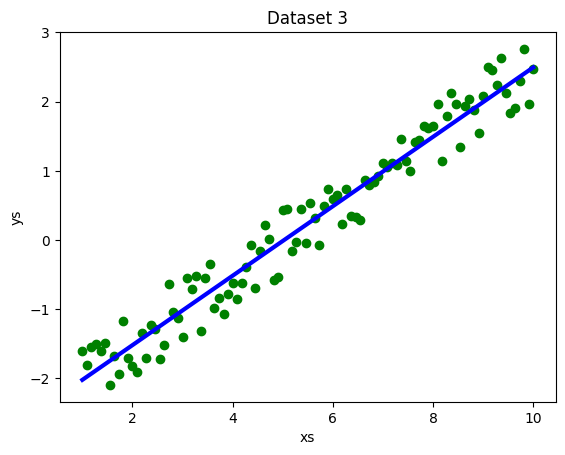

In [50]:
linear_regression_analysis(xs3, ys3, 'green', 'Dataset 3', 'dataset3')

In [51]:
!python -m unittest test_module/test_unit.py

..
----------------------------------------------------------------------
Ran 2 tests in 0.003s

OK


In [52]:
!pytest -v test_score.py

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.4, pluggy-1.5.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collected 4 items                                                                                  

test_score.py::test_mse_1 PASSED                                                             [ 25%]
test_score.py::test_mse_0_8 PASSED                                                           [ 50%]
test_score.py::test_r2_0_9 PASSED                                                            [ 75%]
test_score.py::test_r2_0_7 PASSED                                                            [100%]

======================================== 4 passed in 0.63s =========================================


Отображение датасета с шумами

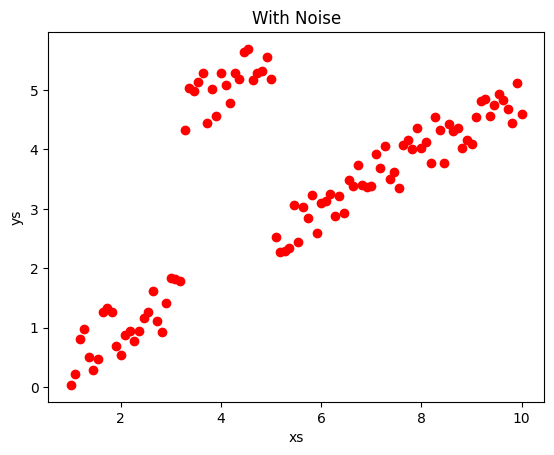

In [53]:
xs3, ys3 = create_dataset(1, 10, 100, 0.5, 1, 0.5, noise_range=(25, 45), additional_noise=3)
plot_dataset(xs3, ys3, 'red', 'With Noise')

Mean squared error for Dataset with Noise: 1.49
Coefficient of determination for Dataset with Noise: 0.40
Coefficients for Dataset with Noise: [0.38194994]


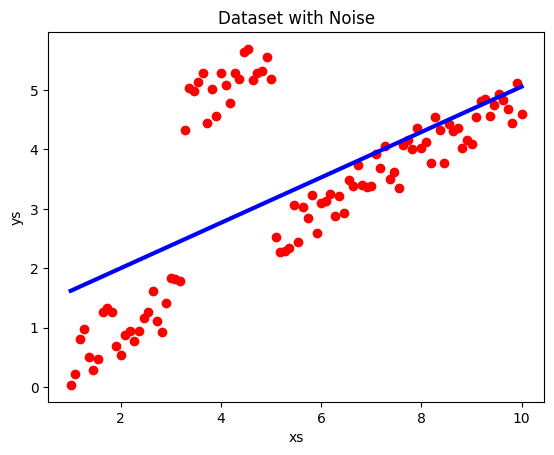

In [54]:
linear_regression_analysis(xs3, ys3, 'red', 'Dataset with Noise', 'dataset1')

In [55]:
!python -m unittest test_module/test_unit.py

FF
FAIL: test_mse (test_module.test_unit.TestMethods)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/content/test_module/test_unit.py", line 10, in test_mse
    self.assertTrue(mean_squared_error(ys, approx) < 1)
AssertionError: False is not true

FAIL: test_r2 (test_module.test_unit.TestMethods)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/content/test_module/test_unit.py", line 15, in test_r2
    self.assertTrue(r2_score(ys, approx) > 0.9)
AssertionError: False is not true

----------------------------------------------------------------------
Ran 2 tests in 0.003s

FAILED (failures=2)


In [56]:
!pytest -v test_score.py

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.4, pluggy-1.5.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collected 4 items                                                                                  

test_score.py::test_mse_1 FAILED                                                             [ 25%]
test_score.py::test_mse_0_8 FAILED                                                           [ 50%]
test_score.py::test_r2_0_9 FAILED                                                            [ 75%]
test_score.py::test_r2_0_7 FAILED                                                            [100%]

============================================= FAILURES =============================================
____________________________________________ test_mse_1 ____________________________________________

load_ys = array([0.03596764, 0.22645436, 0.8159257

### Можно сделать следующий вывод: модель работает стабильно при отсутствии шума, но при наличии шума тесты не проходят.